# Education Departments Employee Exit Survey Analysis

In this project we will be working with exit surveys from employees of the __[Department of Education, Training and Employment (DETE)](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)__ and the __[Technical and Further Education (TAFE)](https://en.wikipedia.org/wiki/Technical_and_further_education)__ institutions in Queensland, Australia. The DETE survey may be found __[here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)__ and the TAFE survey __[here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)__.

In this project we will work on the following questions for our stakeholders:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Let's begin by reading in our datasets and taking a look at them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#reading csv files in and assigning
dete_survey = pd.read_csv(r'C:\Users\kenp8\Documents\Data sets\dete-exit-survey-january-2014.csv')
tafe_survey = pd.read_csv(r'C:\Users\kenp8\Documents\Data sets\tafe-employee-exit-survey-access-database-december-2013.csv',
                          encoding = 'latin-1')

dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),2-Jan,2-Jan
1,6.341340e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341390e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341400e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341470e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),4-Mar,4-Mar


In [5]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge.  Current Age                                                     106
Employment Type.     Employment Type                                         106
Classification.     Classification                                           106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
#checking age columns
print('DETE Ages')
print(dete_survey['Age'].value_counts())
print('\n')
print('TAFE Ages')
print(tafe_survey['CurrentAge.  Current Age'].value_counts())

DETE Ages
61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64


TAFE Ages
56 or older      162
51-55             82
41  45           80
46  50           59
31  35           52
36  40           51
26  30           50
21  25           44
20 or younger     16
Name: CurrentAge.  Current Age, dtype: int64


The TAFE surveys are a bit more granular with 72 columns as opposed to 56 for the DETE surveys. TAFE has 702 rows and DETE has 822. Some of the columns that look interesting in the DETE surveys would be `SeperationType`, `Cease Date`, `DETE Start Date`, `Age` and `Job dissatisfaction`. We can also see that there are a few columns with very little data contained in them we may consider eliminating for our analysis purposes. The `Age` column looks to have a few missing values, and value is given in a range, we'll need to figure out how to handle that. The DETE surveys also have values `not stated` in some columns instead of NaN we would want for analysis.

The TAFE survey has interesting info in the `LengthofServiceOverall. Overall Length of Service at Institute (in years)`, `Reason for ceasing employment`and `CurrentAge. Current Age` columns. Again the age is a range and we will have to deal with that. There looks to be a few missing pieces of data in both the `CurrentAge. Current Age` and `LengthofServiceOverall. Overall Length of Service at Institute (in years)` columns.

Both datasets have a good amount of columns we shouldn't need for our analysis and we will be dropping them.

# Cleaning Data

## Dealing with nonstandard missing values

First lets fix the 'Not Stated' issue in the DETE surveys.

In [8]:
dete_survey = pd.read_csv(r'C:\Users\kenp8\Documents\Data sets\dete-exit-survey-january-2014.csv', na_values = 'Not Stated')
dete_survey.head()  #double check to be sure

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Next we will drop a bunch of columns from both datasets that have no bearing on our analysis. First we will drop columns from DETE, then TAFE.

In [9]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1).copy()
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [10]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1).copy()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
Record ID                                                                    702 non-null float64
Institute                                                                    702 non-null object
WorkArea                                                                     702 non-null object
CESSATION YEAR                                                               695 non-null float64
Reason for ceasing employment                                                701 non-null object
Contributing Factors. Career Move - Public Sector                            437 non-null object
Contributing Factors. Career Move - Private Sector                           437 non-null object
Contributing Factors. Career Move - Self-employment                          437 non-null object
Contributing Factors. Ill Health                                             437 non-null object
Contributing Factors

The columns that were eliminated from the TAFE data contained information dealing with specific workplace procedures and views of each individual's work team. These are not necessary for our purposes. The columns that were eliminated from the DETE data were similarly dealing with specifics of the work environment and benefits in a yes/no fashion and wouldn't provide much insight into our overall goal. 

## Renaming columns

Next we will go about the task of renaming some columns in the datasets, in order to provide ease of combining them later and clarity of their meaning for our purposes. We will start with the DETE data and we will make all column names lower case, replace spaces with underscores and remove any whitespace. Then we will change some names in the TAFE data to make it more clear, consistent and easier to type. Then we will check both to be sure our changes look good.

In [11]:
#cleaning/renaming columns in DETE
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_').copy()

dete_survey_updated.head()#checking work

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [12]:
#renaming some columns in TAFE
tafe_rename = {'Record ID': 'id', 
               'CESSATION YEAR':'cease_date', 
               'Reason for ceasing employment':'separationtype',
               'Gender. What is your Gender?':'gender',
               'CurrentAge.  Current Age':'age',
               'Employment Type. Employment Type':'employment_status',
               'Classification. Classification':'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)':
               'institute_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns = tafe_rename).copy()

tafe_survey_updated.head() #checking work

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,age,Employment Type. Employment Type,Classification. Classification,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),2-Jan,2-Jan
1,6.341340e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341390e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341400e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341470e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),4-Mar,4-Mar


## Further Filtering of Data

Our next step will be to eliminate even more of our data we do not need to answer our stakeholder question about resignation. In order to do this we will only need the data from those people who chose to resign. We will do this by working in both datasets where the string `Resignation` is used.

In [13]:
#checking unique values in seperation type
print('DETE resignation type')
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print('TAFE resignation type')
print(tafe_survey_updated['separationtype'].value_counts())

DETE resignation type
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


TAFE resignation type
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [14]:
#filtering down to resignation info only for TAFE
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()#doublecheck

Resignation    340
Name: separationtype, dtype: int64

In [15]:
#filtering down to resignation info only for DETE
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']
                                        .str.contains('Resignation')].copy()
dete_resignations.tail()#doublecheck and we see all 3 variations in tail

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's clean up the DETE end date.

In [16]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.replace('/', '').str[-4:].astype(float)
dete_resignations.tail() # double check work

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have cleaned up the `cease_date` column in our DETE data, we will examine for inaccurate data. Below we will check in 2 different ways. We will look for unique values in the DETE dataset in both the `cease_date` and the `dete_start_date` columns and by using a boxplot as a second method to examine for incorrect data. Then we will repeat that process for the `cease_date` column in the TAFE data.

In [18]:
dete_resignations['cease_date'].value_counts().sort_values(ascending=False)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
#DETE start date look
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

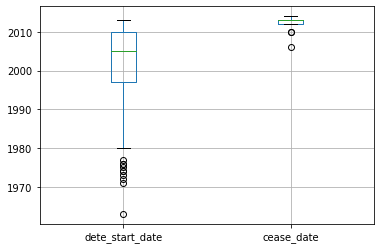

In [20]:
dete_resignations.boxplot(column=['dete_start_date', 'cease_date'])

In [21]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

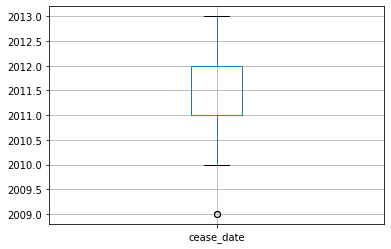

In [22]:
tafe_resignations.boxplot(column = 'cease_date')

In both sets of data there are not any irregularties immediately apparent in the `cease_date` columns. There also don't seem to be any inaccurate values present in the DETE `dete_start_date` column. However, there are a couple outliers. We do not need to concern ourselves with the outliers in the `dete_start_date` as our only concern here is if they were a long term or short term employee for the purposes of this project. We could consider dropping any resignations from either set of data that aren't in the same time frame. There is only 1 resignation in the DETE data before 2009 and only 2 in the TAFE data before 2010. As these will not affect the data greatly we will keep them all. It is also worth noting that there are a considerable higher amount of resignations in the DETE data in 2012 and 2013 compared to other years and a similar pattern in the TAFE data from 2011 and 2012.

Now we will create a `institute_service` column in the `dete_resignations` dataframe in order to be consistent with the TAFE data for comparison.

In [23]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [24]:
#checking to be sure values make sense
dete_resignations['institute_service'].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

Now we will take a look at employees who resigned because they were dissatisfied. We will use the following columns from each of the two dataframes:

1. `tafe_survey_udated` 
 - `Contributing Factors. Dissatisfaction`
 - `Contributing Factors. Job Dissatisfaction`

2. `dete_survey_updated`
 - `job_dissatisfaction`
 - `dissatisfaction_with_the_department`
 - `physical_work_environment`
 - `lack_of_recognition`
 - `lack_of_job_security`
 - `work_location`
 - `employment_conditions`
 - `work_life_balance`
 - `workload`

If the employee marked any one of these as dissatisfied, we'll mark them as `dissatisfied` in a new column. We will start by working with the TAFE dataframe and working to get all our data so we can retrieve, True, False or NaN.

In [25]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We will need to update the values in the TAFE dataframe from proper filtering into the new `dissatisfied` column. Then we will do the same on the DETE dataframe.

In [26]:
def update_vals(z):
    if z == "-":
        return False
    if pd.isnull(z):
        return np.nan
    else:
        return True                       
        
tafe_resignations['dissatisfied'] = tafe_resignations[[
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna = False)

tafe_resignations_up = tafe_resignations.copy()
#check changes
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [27]:
#now for DETE dissatisfied column

dete_resignations['dissatisfied'] = dete_resignations[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload']].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()
#double check work
dete_resignations['dissatisfied'].value_counts(dropna=False)                                                      

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data

We are now ready to combine the data from both dataframes. So that we can differentiate easily between data from the two dataframes in our new combined data, we will add an additional identifier column named `institute` to each. Then we'll drop any remaining columns we don't need. We will start by dropping any columns with less than 500 non null values as they would not provide enough good data for our analysis.

In [28]:
# add institue column
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

In [29]:
#combine dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

#examine null values to determine which data to drop
combined.notnull().sum().sort_values()

C:\Users\kenp8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
Classification.     Classification                                           290
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
Employment Type.     Employm

In [30]:
#dropping columns where non null values less than 500
combined_updated = combined.dropna(axis =1, thresh = 500).copy()

In [31]:
combined_updated.head()

,age,cease_date,dissatisfied,id,institute,institute_service,separationtype
0,36-40,2012.0,False,4.0,DETE,7,Resignation-Other reasons
1,41-45,2012.0,True,6.0,DETE,18,Resignation-Other reasons
2,31-35,2012.0,False,9.0,DETE,3,Resignation-Other reasons
3,46-50,2012.0,True,10.0,DETE,15,Resignation-Other employer
4,31-35,2012.0,False,12.0,DETE,3,Resignation-Move overseas/interstate


## Cleaning Up Combined Data

Now we will deal with cleaning up the `institute service` column in our new combined dataframe. We will base the categories for our analysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage). In it they use good arguments for understanding an employee's needs by career stage instead of birth age.

We will slightly modify the definitions in the article using the definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In the TAFE data there are some `institute_service` entries that contain a month abbreviation. These were not in the data that was originally created in 2014. It appears that there have been a couple of updates to this dataset in July and October of this year(2019), which could be where the changes occured. in most cases it appears as though the year number was replaced by month. In the original raw data the first value for `LengthofServiceOverall. Overall Length of Service at Institute (in years)` was 1-2. We were able to find some saved data that verifies the above pattern so we will insert the old values appropriately below.

In [32]:

#combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('2-Jan', '1-2').str.replace('4-Mar', '3-4').str.replace('6-May', '5-6').str.replace('20-Nov', '11-20')
    
def reset_values(string):
    if string == '2-Jan':
        return '1-2'
    if string == '4-Mar':
        return '3-4'
    if string == '6-May':
        return '5-6'
    if string == '10-Jul':
        return '7-10'
    if string == '20-Nov':
        return '11-20'
    else:
        return string
    
combined_updated['institute_service'] = combined_updated['institute_service'].apply(reset_values)   
    


In [33]:
# get years of service out and set type as float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

#checking extraction
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [34]:
#function to convert experience to categories

def categorize_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val <7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
    
#apply to dataframe to get new category column
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorize_service)

#check work
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Some Initial Analysis

We will replace the missing values in the `dissatisfied` column with the most frequent value `False`. Then we will calculate the percentage of dissatisfied in each `service_cat` and plot the results.

This is meant as an introduction to the analysis, __not__ the final analysis as we still have other missing values to deal with.

In [35]:
#check unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [36]:
# replace NaN with False, most frequent value
combined_updated['dissatisfied'] = combined['dissatisfied'].fillna(False)

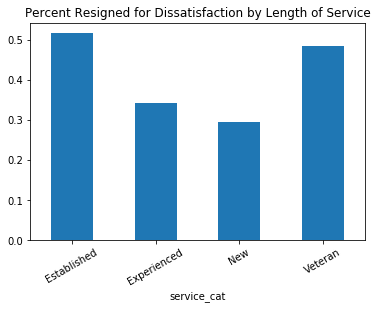

In [37]:
#calculate percentage dissatisfied in each category
diss_pct = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

#plot the results
diss_pct.plot(kind = 'bar', rot= 30, title='Percent Resigned for Dissatisfaction by Length of Service', legend=None)

At first glance we might conclude from above that employees with more than 7 years experience are more likely to resign due to being dissatisfied than those with less experience. However, we would need to handle the rest of the missing data to complete our analysis. We will start by examining where the missing data still exists.

In [38]:
#check for missing data
combined_updated.isnull().sum()

age                     55
cease_date              16
dissatisfied             0
id                       0
institute                0
institute_service       88
separationtype           0
institute_service_up    88
service_cat             88
dtype: int64

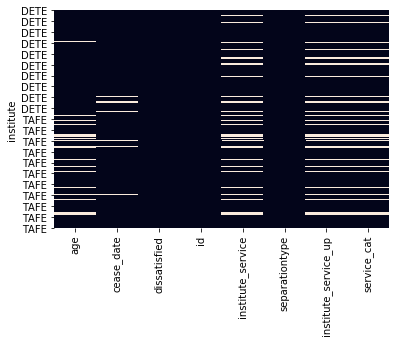

In [39]:
import seaborn as sns
combined_heatmap = combined_updated.set_index('institute')
sns.heatmap(combined_heatmap.isnull(), cbar =False)

Looking at the heatmap above we can see that the missing `service_cat` data correlates closely with missing the `age` data  which is another question our stakeholders wanted us to answer. We will therefore drop these rows as there is no good way to deal with this missing info.

In [40]:
#dropping rows where we have no length of service or age information
combined_updated = combined_updated.drop(combined_updated[(combined_updated['service_cat'].isnull()) &
                              (combined_updated['age'].isnull())].index)

combined_updated.head()

,age,cease_date,dissatisfied,id,institute,institute_service,separationtype,institute_service_up,service_cat
0,36-40,2012.0,False,4.0,DETE,7,Resignation-Other reasons,7.0,Established
1,41-45,2012.0,True,6.0,DETE,18,Resignation-Other reasons,18.0,Veteran
2,31-35,2012.0,False,9.0,DETE,3,Resignation-Other reasons,3.0,Experienced
3,46-50,2012.0,True,10.0,DETE,15,Resignation-Other employer,15.0,Veteran
4,31-35,2012.0,False,12.0,DETE,3,Resignation-Move overseas/interstate,3.0,Experienced


In [41]:
#recheck for missing data
combined_updated.isnull().sum()

age                      2
cease_date              13
dissatisfied             0
id                       0
institute                0
institute_service       35
separationtype           0
institute_service_up    35
service_cat             35
dtype: int64

We will now work on cleaning the age column. In order to help answer the stakeholder question about younger vs. older employees. The age information in both sets of data is provided in a range. we will stick with using a range. We have chosen to use based on the ranges in each set of data:

- `Aged 25 and under`
- `Aged 26-35`
- `Aged 36-45`
- `Aged 46-55`
- `Aged over 56` 

In [42]:
#examining age column
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45          45
46-50            42
36-40            41
46  50          39
26-30            35
21  25          33
31  35          32
36  40          32
26  30          32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [43]:
#combining age data from both original dataframes
combined_updated['age'] = combined_updated['age'].str.replace('  ', '-').replace('56-60', '56 or older').replace('61 or older', '56 or older')

#converting to float type and only keeping first number in age categories
combined_updated['age'] = combined_updated['age'].str.extract(r'(\d+)').astype(float)
combined_updated['age'].value_counts()

41.0    93
46.0    81
56.0    78
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
20.0    10
Name: age, dtype: int64

In [44]:
#function to group by age

def categorize_age(val):
    if val < 26:
        return "Aged 25 and under"
    elif 26 <= val < 36:
        return "Aged 26-35"
    elif 36 <= val < 46:
        return "Aged 36-45"
    elif 46 <= val < 56:
        return "Aged 46-55"
    elif val == 56:
        return "Aged over 56"
    else:
        return np.nan
    
#apply to dataframe to get new category column
combined_updated['age_cat'] = combined_updated['age'].apply(categorize_age)

#check work
combined_updated['age_cat'].value_counts(dropna=False)

Aged 36-45           166
Aged 46-55           152
Aged 26-35           128
Aged over 56          78
Aged 25 and under     72
NaN                    2
Name: age_cat, dtype: int64

Now that we have our ages categorized we notice we still have two missing ages. We will simply replace these with the most common result. Amount is small and won't affect results in any significant way.

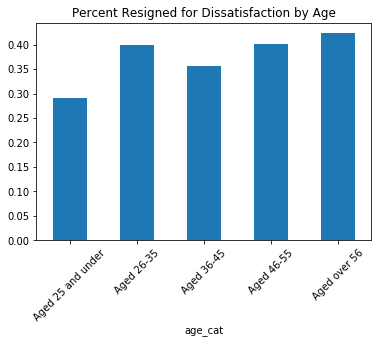

In [45]:
#fill missing data w/most common result
combined_updated['age_cat'].fillna('Aged 36-45', inplace=True)

#calculate percentage dissatisfied in each category
diss_pct_age = combined_updated.pivot_table(index = 'age_cat', values = 'dissatisfied')

#plot the results
diss_pct_age.plot(kind = 'bar', rot= 45, title ='Percent Resigned for Dissatisfaction by Age', legend=None)

There doesn't seem to be a completely clear trend for resigning due to dissatisfaction based on age. One observation we can make from above is that the `Aged 25 and under` employees are the least likely to resign due to some sort of dissatisfaction.

We still want to deal with the 35 remaining missing values in the `service_cat` column. We will accomplish this by selecting each category in the `age_cat` column. Then taking the mean of the corresponding length of service from the `institute_service_up` column and using that mean length of service by age to fill in the `service_cat` column for each age group.

In [46]:
age_cats = combined_updated['age_cat'].unique()
for cat in age_cats:
    cat_select = combined_updated['institute_service_up'][combined_updated['age_cat'] == cat]
    mean_service = cat_select.mean()
    service_designate = categorize_service(mean_service)
    combined_updated.loc[(pd.isnull(combined_updated.service_cat)), 'service_cat'] = service_designate
    #printing to make sure results make sense
    print(cat,mean_service, service_designate)
    
#double checking that values were filled in
combined_updated['service_cat'].unique()

Aged 36-45 6.314465408805032 Experienced
Aged 26-35 3.846774193548387 Experienced
Aged 46-55 8.746478873239436 Established
Aged over 56 16.246376811594203 Veteran
Aged 25 and under 1.9565217391304348 New


array(['Established', 'Veteran', 'Experienced', 'New'], dtype=object)

Now that we have updated the missing values we will take another look at the stakeholder question regarding length of service and likelihood of resigning due to dissatisfaction. It once again appears as though employees with over 7 years of service represented by the 'Established' and 'Experienced' service length categories are more likely to resign due to some sort of dissatisfaction.

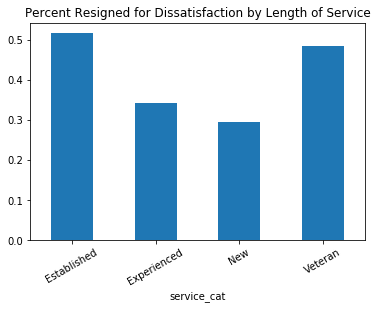

In [47]:
#after filling NaN values, recalculate percentage dissatisfied in each category
diss_pct = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

#plot the results
diss_pct.plot(kind = 'bar', rot= 30, title = 'Percent Resigned for Dissatisfaction by Length of Service', legend=None)

Now that we have looked at the DETE survey and TAFE survey data combined, we will look at them seperately for further insights. First we will investigate the length of service question, then the question regarding age.

In [48]:
#seperating data to each individual institution
dete_combined = combined_updated[combined_updated['institute'] == 'DETE']
tafe_combined = combined_updated[combined_updated['institute'] == 'TAFE']

#creating pivot tables to look at length of service by institution
dete_diss_pct = dete_combined.pivot_table(index = 'service_cat', values = 'dissatisfied')
tafe_diss_pct = tafe_combined.pivot_table(index = 'service_cat', values = 'dissatisfied')

#creating pivot table to look at age categories
dete_diss_age = dete_combined.pivot_table(index = 'age_cat', values = 'dissatisfied')
tafe_diss_age = tafe_combined.pivot_table(index = 'age_cat', values = 'dissatisfied')

Let's examine the data we get in the both the age and experience pivot tables for each institution individually. After that we will compare them to one another. In this step we will also take the time to reorder our experience graphs so they will be better understood and more closely follow what we have for our age graphs. We will go from the least amount of experience to the most.

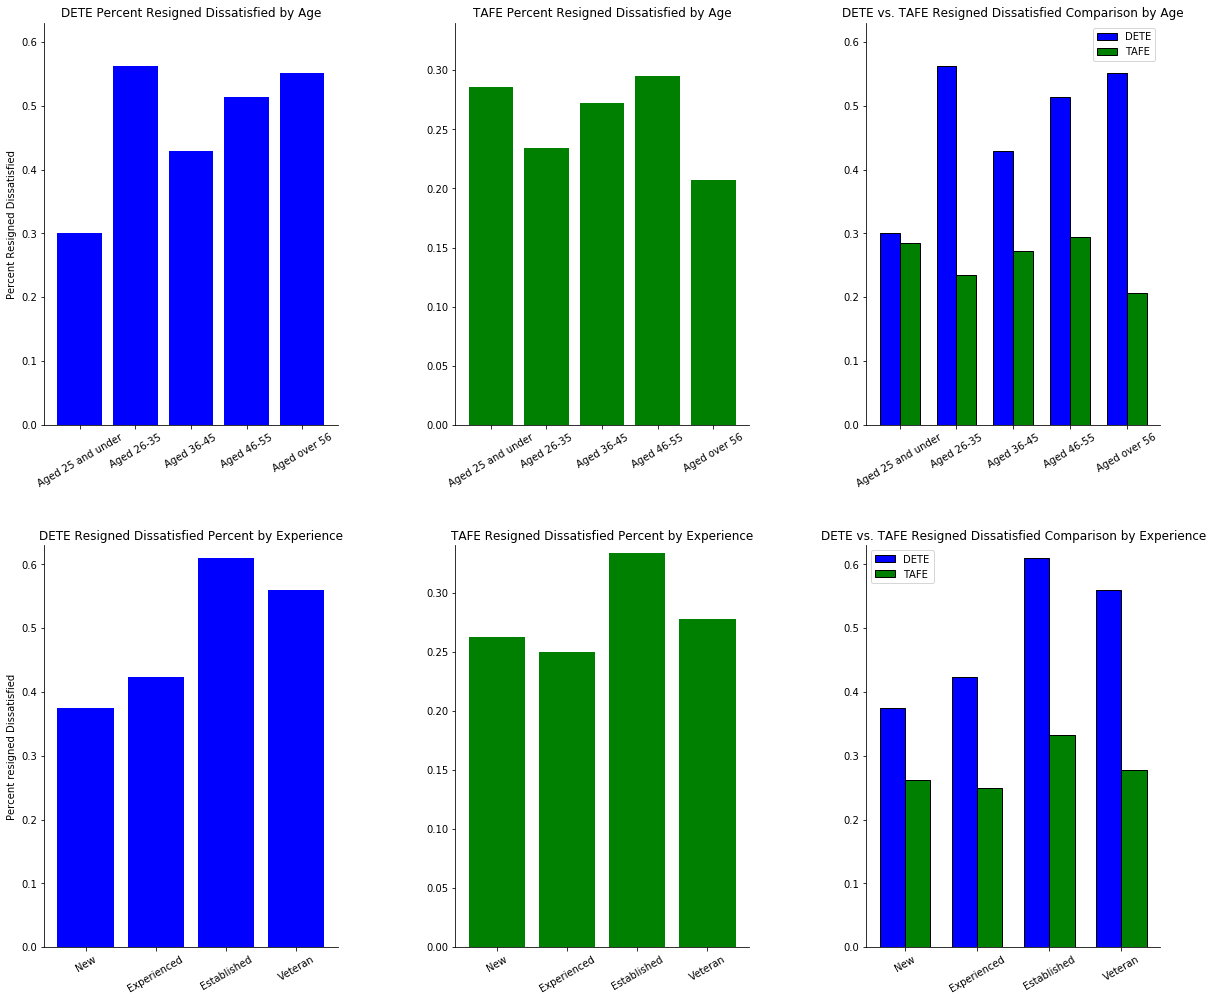

In [52]:
# getting values for age barcharts
dete_age_values = dete_diss_age['dissatisfied'].unique()
tafe_age_values = tafe_diss_age['dissatisfied'].unique()

age_cats = dete_diss_age.index

ind = np.arange(5)
width = .35

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 17))
ax1, ax2, ax3,ax4, ax5, ax6 = ax.flatten()
fig.subplots_adjust(wspace = .4, hspace = .3)

#Top left: DETE age value bar chart
ax1.bar(ind, dete_age_values, color='blue')
ax1.set_title('DETE Percent Resigned Dissatisfied by Age')
ax1.set_xticks(ind)
ax1.set_xticklabels(age_cats, rotation = 30)
ax1.set_ylabel('Percent Resigned Dissatisfied')
ax1.set_ylim(0, .63)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

#Middle left: TAFE age value bar chart
ax2.bar(ind, tafe_age_values, color='green')
ax2.set_title('TAFE Percent Resigned Dissatisfied by Age')
ax2.set_xticks(ind)
ax2.set_xticklabels(age_cats, rotation = 30)
ax2.set_ylim(0, .34)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#Top right: Combined age chart to show value differences
p1 = ax3.bar(ind, dete_age_values, width, color='blue', label='DETE', edgecolor = 'black')
p2 = ax3.bar(ind + width, tafe_age_values, width, color='green', label='TAFE', edgecolor = 'black')

ax3.set_title('DETE vs. TAFE Resigned Dissatisfied Comparison by Age')
ax3.set_xticks(ind + width/ 2)
ax3.set_xticklabels(age_cats, rotation = 30)
ax3.set_ylim(0, .63)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax3.legend((p1[0], p2[0]), ('DETE', 'TAFE'))
ax3.autoscale_view()

#Experience charts
#getting experience charts in order from least to most experience
exp_labels = ('New', 'Experienced', 'Established', 'Veteran')
tafe_diss_values = []
dete_diss_values =[]
for lbl in exp_labels:
    tafe_value = tafe_diss_pct['dissatisfied'][lbl]
    dete_value = dete_diss_pct['dissatisfied'][lbl]
    tafe_diss_values.append(tafe_value)
    dete_diss_values.append(dete_value)

ind_2 = np.arange(4)

#Bottom left: DETE length of service chart
ax4.bar(ind_2, dete_diss_values, color = 'blue')
ax4.set_title('DETE Resigned Dissatisfied Percent by Experience')
ax4.set_xticks(ind_2)
ax4.set_xticklabels(exp_labels, rotation = 30)
ax4.set_ylabel('Percent resigned Dissatisfied')
ax4.set_ylim(0, .63)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

#Bottom middle: TAFE length of service chart
ax5.bar(ind_2, tafe_diss_values, color = 'green')
ax5.set_title('TAFE Resigned Dissatisfied Percent by Experience')
ax5.set_xticks(ind_2)
ax5.set_xticklabels(exp_labels, rotation = 30)
ax5.set_ylim(0, .34)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

#Bottom right: combined length of service chart
p3 = ax6.bar(ind_2, dete_diss_values, width, color='blue', label='DETE', edgecolor = 'black')
p4 = ax6.bar(ind_2 + width, tafe_diss_values, width, color='green', label='TAFE', edgecolor = 'black')

ax6.set_title('DETE vs. TAFE Resigned Dissatisfied Comparison by Experience')
ax6.set_xticks(ind_2 + width/ 2)
ax6.set_xticklabels(exp_labels, rotation = 30)
ax6.set_ylim(0, .63)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

ax6.legend((p3[0], p4[0]), ('DETE', 'TAFE'), loc = 'upper left')
ax6.autoscale_view()

plt.show()

In the above graphs we can see that our overall claim that those employees with over 7 years on the job are more likely to resign to due to some sort of dissatisfaction holds for both institutions. We can also see that the trend is more pronounced in the DETE survey. 

The age category does not give us a clear answer for a trend concerning young vs. old employees. Again we see significantly higher rate of resigning due to some sort of dissatisfaction in the DETE survey results. We also observe that the `Aged 26-35` age categoery in the DETE results seems to be somewhat of an outlier compared to the other age categories in the DETE survey and the same age category in the TAFE survey. Below we took a quick look to see if we could find any insight into this phenomenon but no reason for this was revealed.

In [50]:
dete_combined[dete_combined['age_cat'] == 'Aged 26-35']['separationtype'].value_counts()

Resignation-Other reasons               25
Resignation-Other employer              20
Resignation-Move overseas/interstate    19
Name: separationtype, dtype: int64

## Conclusion

Our first stakeholder question was concerned with whether or not employees who have been there a short time or long time are resigning due to some sort of dissatisfaction?  Those employees that have been there less than 3 years had the lowest incidence of resigning due to being dissatisfied. The employees that have a length of service of over 7 years were more likely to resign due to being dissatisfied. This trend was more pronounced in the DETE survey.

Our second question dealt with younger and older employees resigning due to some sort of dissatisfaction. No clear trend from younger to older was found. One observation was those employees under 25 years of age were least likely to resign due to some sort of dissatisfaction in the combined surveys. 

There was a significantly higher incidence of resignation due to some sort of dissatisfaction in the DETE(about %49) survey compared to the TAFE(about29%) survey. Further investigation as to why this exists would be a good next step. Another possibility is to investigate further why the `Aged 36-45` age category in the DETE survey seems to be a bit of an outlier.